In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import PolynomialFeatures

In [12]:
df = pd.read_csv("../Resources/Clean Data/HUD_Award_2005-2023_clean.csv")
df.head()

,Year,State,Award Amount
0,2023,AL,19580755
1,2023,AR,4172821
2,2023,AZ,65703841
3,2023,CA,601364006
4,2023,CO,39835760


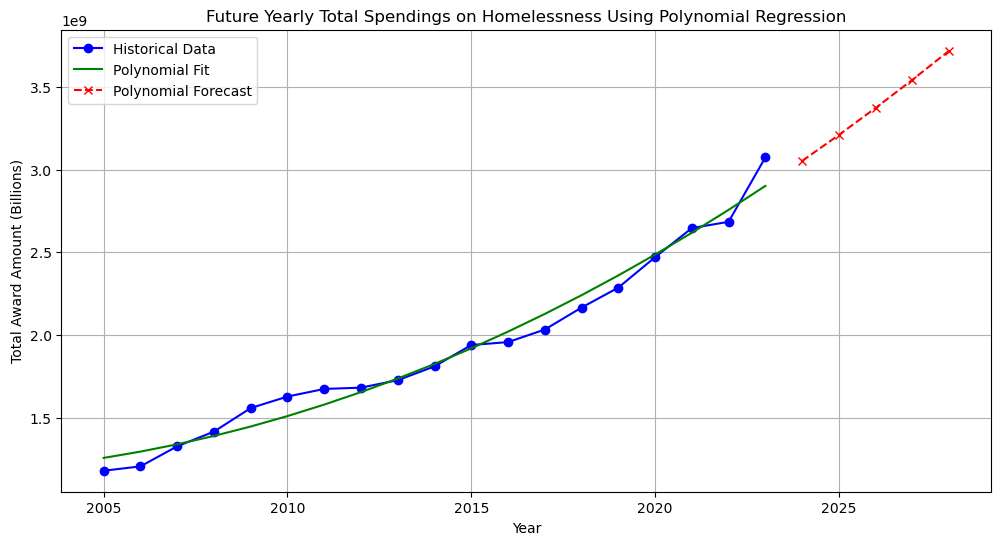

(array([2024, 2025, 2026, 2027, 2028]),
 array([3.05207778e+09, 3.20924263e+09, 3.37267874e+09, 3.54238610e+09,
        3.71836470e+09]))

In [22]:
yearly_totals_df = df.groupby('Year')['Award Amount'].sum().reset_index()

X_df = yearly_totals_df[['Year']].values  
y_df = yearly_totals_df['Award Amount'].values  

poly_features_df = PolynomialFeatures(degree=2)
X_poly_df = poly_features_df.fit_transform(X_df)

model_poly_df = LinearRegression()
model_poly_df.fit(X_poly_df, y_df)

forecast_years_df = np.array([[year] for year in range(2024, 2029)])
forecast_years_poly_df = poly_features_df.transform(forecast_years_df)

forecast_values_poly_df = model_poly_df.predict(forecast_years_poly_df)

plt.figure(figsize=(12, 6))
plt.plot(yearly_totals_df['Year'], yearly_totals_df['Award Amount'], label='Historical Data', marker='o', color='blue')
plt.plot(yearly_totals_df['Year'], model_poly_df.predict(X_poly_df), label='Polynomial Fit', linestyle='-', color='green')
plt.plot(forecast_years_df.flatten(), forecast_values_poly_df, label='Polynomial Forecast', marker='x', linestyle='--', color='red')

plt.title('Future Yearly Total Spendings on Homelessness Using Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Total Award Amount (Billions)')
plt.legend()
plt.grid(True)
plt.show()

forecast_years_df.flatten(), forecast_values_poly_df